# **COVID-19 Dataset - How to use it?**

## ***Background***

Due to the relevance of the COVID-19 global pandemic, we are releasing our dataset of tweets acquired from the Twitter Stream related to COVID-19 chatter. 

The data collected from the stream captures all languages, but the higher prevalence are:  English, Spanish, and French. We release all tweets and retweets on the full_dataset.tsv file, and a cleaned version with no retweets on the full_dataset-clean.tsv file .

The main repository for this dataset (and latest version) can be found here https://doi.org/10.5281/zenodo.3723939

Intermediate bi-weekly updates are posted here: https://github.com/thepanacealab/covid19_twitter

As always, the tweets distributed here are only tweet identifiers (with date and time added) due to the terms and conditions of Twitter to re-distribute Twitter data. They need to be hydrated to be used.

![_112236461_gettyimages-1209519827[1].jpg](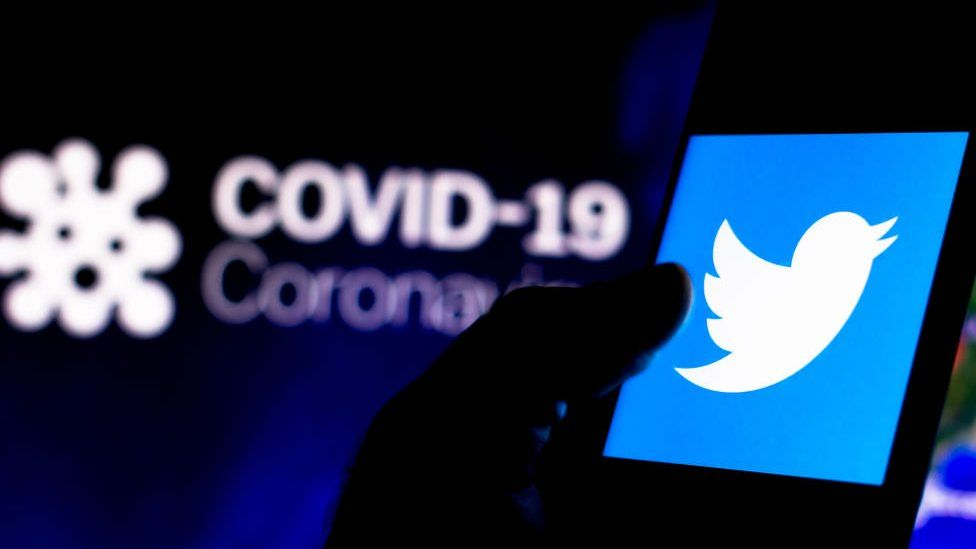)


If you are using our dataset, please cite our preprint:
https://arxiv.org/abs/2004.03688

## ***Introduction***


In this tutorial, we will explain in a clear and detailed way how to use the data sets generated from this repository (https://github.com/thepanacealab/covid19_twitter/tree/master/dailies). It will explain how the process of hydration of tweets is done, the process of parsing, and an example that consists of counting the unique words of a certain dataset of tweets.
![github-logo-768x373[1].jpeg](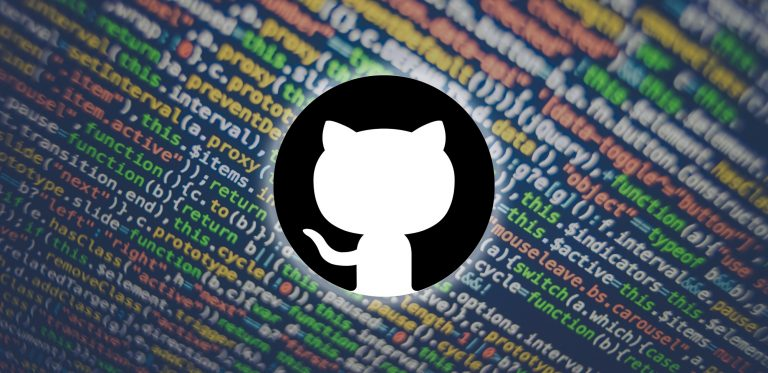)



## ***Requirements***

First, we are going to install the following modules:

*   Twarc
*   Tweepy (v. 3.8.0)
*   Argparse (v 3.2)
*   Xtract (v 0.1 a3)
*   Wget (v 3.2)







In [ ]:
!python --version

Python 3.7.13


In [1]:
from IPython.display import clear_output
!pip install twarc #Twarc
!pip install 'tweepy == 3.8.0' # Tweepy 3.8.0
!pip install 'argparse == 1.2.2' #Argparse 3.2
!pip install xtract #Xtract 0.1 a3
!pip install 'wget == 3.2' #Wget 3.2
#clear_output()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60 kB 5.5 MB/s 
     |████████████████████████████████| 102 kB 41.3 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=f4662968acec980c29bfce202592f82e4d097eb24f8e5e8d916a9907fbe4545a
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj
  Attempting uninstall: humanize
    Found existing installation: humanize 0.5.1
    Uninstalling humanize-0.5.1:
      Successfully uninstalled humanize-0.5.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-whee

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=447ae1e19f7102d8474503282104e7e7c8db43c79cddcf3fcd87aaa004194696
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


## ***Selecting the dataset and language***

The dataset used for this tutorial was downloaded from here:
https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-01-20/2021-01-20_clean-dataset.tsv.gz?raw=true

More datasets can be obtained from here:
https://github.com/thepanacealab/covid19_twitter/tree/master/dailies

The structure of the dataset is made up of the following fields:

*   **tweet_id** *The integer representation of the unique identifier for this Tweet.*
*   **date** *Date when the tweet was posted (YYYY-MM-DD)*
*   **time** *Time when the tweet was posted (HH:mm:ss)*
*   **lang** *Language in which the text is written. Represented by a 2-character language code. If language is unknown, the value will be shown as 'und' (undefined)*
*   **country_code** *Two character string representing the country where the tweet was written. If not known, the field will show as NULL*

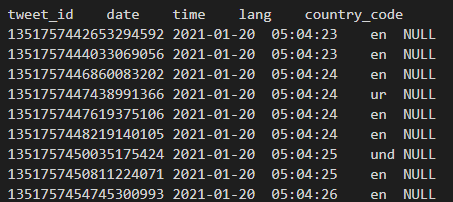

**Filtering a dataset from a language** is done by specifying the language code. More information about language codes can be found here:

https://developer.twitter.com/en/docs/twitter-for-websites/supported-languages

In this example,we are going to filter the dataset, so we can only obtain tweets in spanish (So, that means we are going to use the language code "es")

**IMPORTANT:** In this tutorial, after running the following code, please select the desired language to filter from the dropdown field (which is shown in the output code). If we don't want to filter the dataset, just select "all" in the dropdown field. 

In [2]:
import gzip
import shutil
import os
import wget
import csv
import linecache
from shutil import copyfile
import ipywidgets as widgets
import numpy as np
import pandas as pd

dataset_URL = "https://github.com/thepanacealab/covid19_twitter/blob/master/dailies/2021-01-20/2021-01-20_clean-dataset.tsv.gz?raw=true" #@param {type:"string"}


#Downloads the dataset (compressed in a GZ format)
#!wget dataset_URL -O clean-dataset.tsv.gz
wget.download(dataset_URL, out='clean-dataset.tsv.gz')

#Unzips the dataset and gets the TSV dataset
with gzip.open('clean-dataset.tsv.gz', 'rb') as f_in:
    with open('clean-dataset.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

#Deletes the compressed GZ file
os.unlink("clean-dataset.tsv.gz")

#Gets all possible languages from the dataset
df = pd.read_csv('clean-dataset.tsv',sep="\t")
lang_list = df.lang.unique()
lang_list= sorted(np.append(lang_list,'all'))
lang_picker = widgets.Dropdown(options=lang_list, value="all")
lang_picker

Dropdown(options=('all', 'am', 'ar', 'bg', 'bn', 'bo', 'ca', 'ckb', 'cs', 'cy', 'da', 'de', 'dv', 'el', 'en', …

## ***Filtering the dataset by language***

After selecting the desired language, the following code will perform the corresponding filtering to show only the records in the dataset that have the selected language (in a new tsv file called ***clean-dataset-filtered.tsv***). If there's no language filter, no filter process will be taken (but the file name will be ***clean-dataset-filtered.tsv*** anyways)

In [3]:
#Creates a new clean dataset with the specified language (if specified)
filtered_language = lang_picker.value

#If no language specified, it will get all records from the dataset
if filtered_language == "":
  copyfile('clean-dataset.tsv', 'clean-dataset-filtered.tsv')

#If language specified, it will create another tsv file with the filtered records
else:
  filtered_tw = list()
  current_line = 1
  with open("clean-dataset.tsv") as tsvfile:
    tsvreader = csv.reader(tsvfile, delimiter="\t")

    if current_line == 1:
      filtered_tw.append(linecache.getline("clean-dataset.tsv", current_line))

      for line in tsvreader:
        if line[3] == filtered_language:
          filtered_tw.append(linecache.getline("clean-dataset.tsv", current_line))
        current_line += 1

  print('\033[1mShowing first 5 tweets from the filtered dataset\033[0m')
  print(filtered_tw[1:(6 if len(filtered_tw) > 6 else len(filtered_tw))])

  with open('clean-dataset-filtered.tsv', 'w') as f_output:
      for item in filtered_tw:
          f_output.write(item)

Showing first 5 tweets from the filtered dataset
['1351757736208424963\t2021-01-20\t05:05:33\tit\tNULL\n', '1351757850041843715\t2021-01-20\t05:06:00\tit\tNULL\n', '1351758300082130944\t2021-01-20\t05:07:47\tit\tNULL\n', '1351758646972133378\t2021-01-20\t05:09:10\tit\tNULL\n', '1351758778790797314\t2021-01-20\t05:09:41\tit\tNULL\n']


## ***Introducing our Twitter credentials to authenticate***

Accessing the Twitter APIs requires a set of credentials that you must pass with each request. These credentials can come in different forms depending on the type of authentication that is required by the specific endpoint that you are using. More information: https://developer.twitter.com/en/docs/apps/overview

The credentials can be obtained from the developer portal (https://developer.twitter.com/en/portal/dashboard) and they look like these ones:

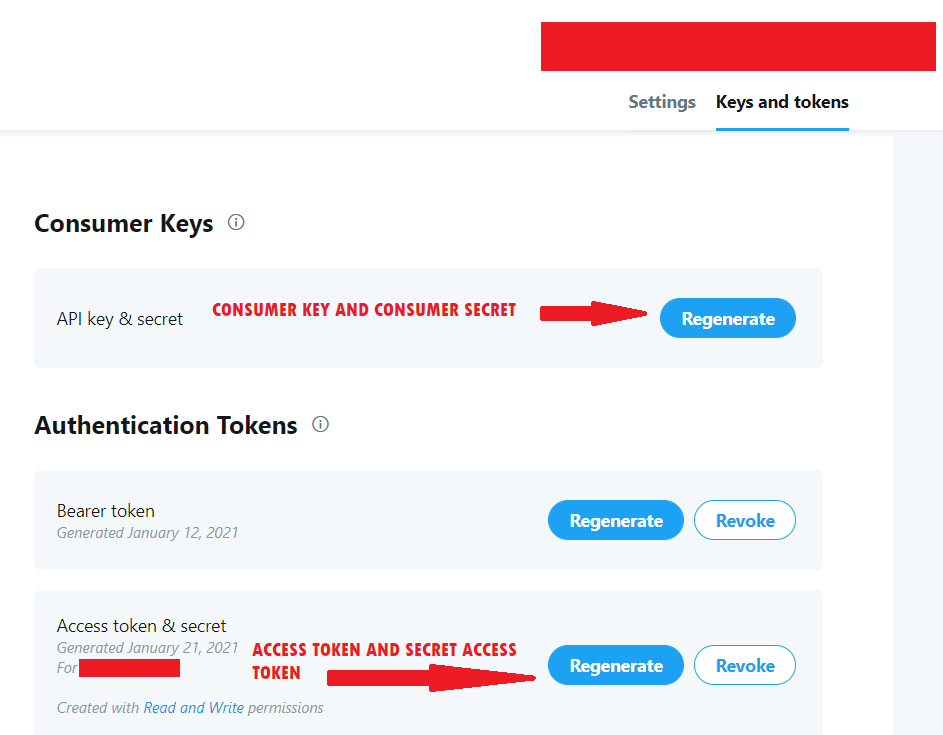

**IMPORTANT:** The following code will also generate an *api_keys.json* (With the twitter credentials entered) that will be required later.  

In [4]:
import json
import tweepy
from tweepy import OAuthHandler

# Authenticate
CONSUMER_KEY = "" #@param {type:"string"}
CONSUMER_SECRET_KEY = "" #@param {type:"string"}
ACCESS_TOKEN_KEY = "" #@param {type:"string"}
ACCESS_TOKEN_SECRET_KEY = "" #@param {type:"string"}

#Creates a JSON Files with the API credentials
with open('api_keys.json', 'w') as outfile:
    json.dump({
    "consumer_key":CONSUMER_KEY,
    "consumer_secret":CONSUMER_SECRET_KEY,
    "access_token":ACCESS_TOKEN_KEY,
    "access_token_secret": ACCESS_TOKEN_SECRET_KEY
     }, outfile)

#The lines below are just to test if the twitter credentials are correct
# Authenticate
#auth = tweepy.AppAuthHandler(CONSUMER_KEY, CONSUMER_SECRET_KEY)

#api = tweepy.API(auth, wait_on_rate_limit=True,
#				   wait_on_rate_limit_notify=True)

#if (not api):
#    print ("Can't Authenticate")
#    sys.exit(-1)

## ***Hydrating the tweets (filtered dataset)***

Before parsing the dataset, an hydration process is required. In this tutorial it is done by using the following social media mining tool: https://github.com/thepanacealab/SMMT

To perform this action, a python file from that repository is required (*get_metadata.py*) and can be obtained in the following way:

In [5]:
from IPython.display import clear_output

!wget https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_acquisition/get_metadata.py -O get_metadata.py

#clear_output()

--2022-07-05 18:14:50--  https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_acquisition/get_metadata.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7205 (7.0K) [text/plain]
Saving to: ‘get_metadata.py’

get_metadata.py     100%[===================>]   7.04K  --.-KB/s    in 0s      

2022-07-05 18:14:50 (52.6 MB/s) - ‘get_metadata.py’ saved [7205/7205]



This utility will take a file which meets the following requirements:

*   A csv file which either contains one tweet id per line or contains at least one column of tweet ids
*   A text file which contains one tweet id per line
*   A tsv file which either contains one tweet id per line or contains at least one column of tweet ids

For this case, the filtered dataset generated before (*clean-dataset-filtered.tsv*), which is in **TSV format** will be used for the hydration process

The arguments for this utily (***get_metadata.py***) are the following:

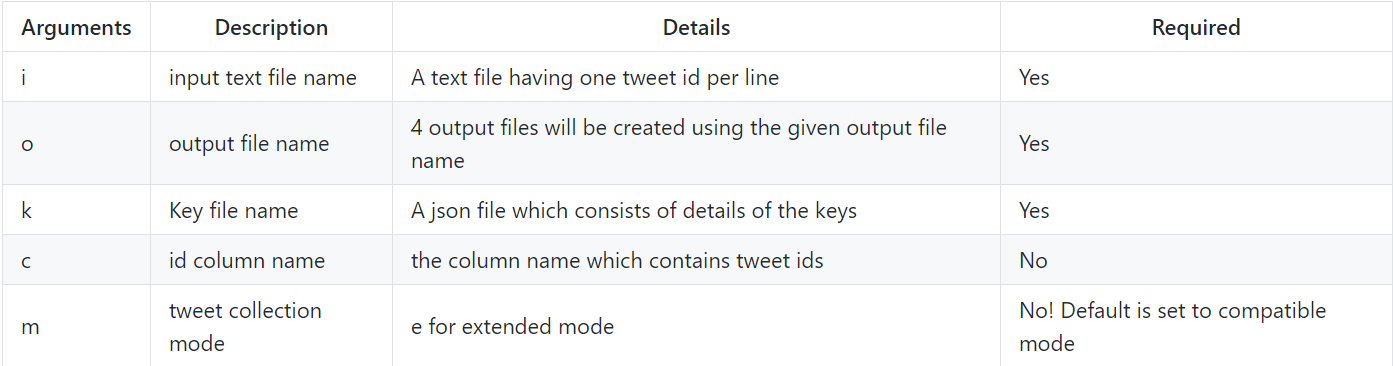

**PLEASE NOTE:** The *-k* argument refers to the json file with the Twitter credentials generated before (***api_keys.json***)

In [6]:
!python get_metadata.py -i clean-dataset-filtered.tsv -o hydrated_tweets -k api_keys.json

#clear_output()

Your twitter api credentials are valid.
hydrated_tweets
tab seperated file, using \t delimiter
total ids: 5427
metadata collection complete
creating master json file
currently getting 0 - 100
currently getting 100 - 200
currently getting 200 - 300
currently getting 300 - 400
currently getting 400 - 500
currently getting 500 - 600
currently getting 600 - 700
currently getting 700 - 800
currently getting 800 - 900
currently getting 900 - 1000
currently getting 1000 - 1100
currently getting 1100 - 1200
currently getting 1200 - 1300
currently getting 1300 - 1400
currently getting 1400 - 1500
currently getting 1500 - 1600
currently getting 1600 - 1700
currently getting 1700 - 1800
currently getting 1800 - 1900
currently getting 1900 - 2000
currently getting 2000 - 2100
currently getting 2100 - 2200
currently getting 2200 - 2300
currently getting 2300 - 2400
currently getting 2400 - 2500
currently getting 2500 - 2600
currently getting 2600 - 2700
currently getting 2700 - 2800
currently getti

From the code above, the output will generate four files:

*   A hydrated_tweets.json file which contains the full json object for each of the hydrated tweets
*   A hydrated_tweets.CSV file which contains partial fields extracted from the tweets.
*   A hydrated_tweets.zip file which contains a zipped version of the tweets_full.json file.
*   A hydrated_tweets_short.json which contains a shortened version of the hydrated tweets.

For this tutorial, we will use ***the hydrated_tweets_short.json*** file to parse all their tweets.

##***Parsing the tweets***

###***Requirements***

For this process, the following files are required and can be obtained from here:

*   https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_preprocessing/parse_json_lite.py
*   https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_preprocessing/fields.py

Also the following modules are required:

*   Emot
*   Emoji

In [1]:
from IPython.display import clear_output

#!wget https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_preprocessing/parse_json_lite.py -O parse_json_lite.py
!wget https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_preprocessing/fields.py -O fields.py

!wget https://raw.githubusercontent.com/lucapug/SMMT/master/data_preprocessing/parse_json_lite.py -O parse_json_lite.py

!pip install emot --upgrade
!pip install emoji --upgrade

#!python -m pip install --upgrade pip
#!pip install tweet-preprocessor as p --upgrade #ERROR: Could not find a version that satisfies the requirement..ERROR: Could not find a version that satisfies the requirement

#clear_output()

--2022-07-05 18:37:43--  https://raw.githubusercontent.com/thepanacealab/SMMT/master/data_preprocessing/fields.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5156 (5.0K) [text/plain]
Saving to: ‘fields.py’

fields.py           100%[===================>]   5.04K  --.-KB/s    in 0s      

2022-07-05 18:37:43 (54.7 MB/s) - ‘fields.py’ saved [5156/5156]

--2022-07-05 18:37:43--  https://raw.githubusercontent.com/lucapug/SMMT/master/data_preprocessing/parse_json_lite.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3446 (3.4K) [t

### ***Pulling a sample set from the tweets***

For this tutorial, we are going to get a sample of N tweets from the hydrated dataset generated before (***hydrated_tweets_short.json***). The code below will generate a new JSON file (***sample_data.json***) with the number of samples specified.

***PLEASE NOTE:*** The code below will extract N samples from the hydrated tweets randomly

In [2]:
import random 

no_samples = "1000" #@param {type:"string"}
list_tweets = None

with open("hydrated_tweets_short.json", "r") as myfile:
    list_tweets = list(myfile)

if int(no_samples) > len(list_tweets):
    no_samples = len(list_tweets)

sample = random.sample(list_tweets, int(no_samples))

file = open("sample_data.json", "w")
for i in sample:
  file.write(i)
file.close() #This close() is important

print(list_tweets[:5])

['{"created_at": "Wed Jan 20 05:36:16 +0000 2021", "text": "Coronavirus nel mondo, negli Stati Uniti pi\\u00f9 di 400 mila morti https://t.co/3Yl24b19W4", "in_reply_to_screen_name": null, "retweet_count": 0, "favorite_count": 0, "source": "Informazione", "id_str": "1351765465438294017", "is_retweet": false}\n', '{"created_at": "Wed Jan 20 05:05:33 +0000 2021", "text": "Coronavirus, sei settimane consecutive di aumento dei casi.  L\\u2019et\\u00e0 degli infetti risale IL RAPPORTO DELLA CABINA https://t.co/wuREC6mZCw", "in_reply_to_screen_name": null, "retweet_count": 0, "favorite_count": 0, "source": "Revive Social App", "id_str": "1351757736208424963", "is_retweet": false}\n', '{"created_at": "Wed Jan 20 06:09:03 +0000 2021", "text": "Il punto sulla pandemia nel mondo https://t.co/dUrgYRHkzr", "in_reply_to_screen_name": null, "retweet_count": 1, "favorite_count": 0, "source": "PostPickr", "id_str": "1351773717022519303", "is_retweet": false}\n', '{"created_at": "Wed Jan 20 05:09:41 +00

### ***Parsing the tweets***

***parse_json_lite.py:*** The first argument is the json file. The second argument is optional. If the second argument is given, it will preprocess the json file. The preprocessing includes removal of URLs, twitter specific Urls, Emojis, Emoticons. ***The second argument (if given) must be "p" for the preprocessing work***

The following code will extract all fields in a JSON file (***sample_data.json*** in this case). Here is a list of all available fields: https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet

Keep in mind that some fields could have ***null*** or ***empty*** values.

In [3]:
#!python parse_json_lite.py sample_data.json p #File "parse_json_lite.py", line 26...ImportError: cannot import name 'UNICODE_EMO' from 'emot.emo_unicode'
!python parse_json_lite.py sample_data.json 

#p.clean_file('sample_data.json')

#clear_output()

parse_json_lite.py:84: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  tweet_df = pd.io.json.json_normalize(data)


### ***Counting the unique words from a sample set***

Given the previous sample dataset (from ***sample_data.json***), the following code will count all the unique words (with it's frequency) in a pandas Dataframe. 

For practical purposes, the first 20 most used words in the dataset sample are shown in the output (this variable can be modified below).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   created_at               1000 non-null   datetime64[ns, UTC]
 1   text                     1000 non-null   object             
 2   in_reply_to_screen_name  81 non-null     object             
 3   retweet_count            1000 non-null   int64              
 4   favorite_count           1000 non-null   int64              
 5   source                   1000 non-null   object             
 6   id_str                   1000 non-null   int64              
 7   is_retweet               1000 non-null   bool               
dtypes: bool(1), datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 55.8+ KB
Top 20 most unique words used from the dataset 

        Word  Frequency
          di        360
          in        266
           e        245
      

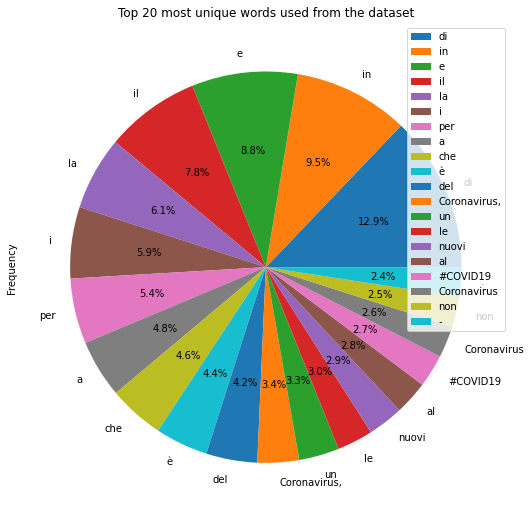

In [4]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

no_top_unique_words = "20" #@param {type:"string"}

#df = pd.read_csv('sample_data.tsv',sep="\t")

df = pd.read_json('sample_data.json', lines=True)

df.info()

result = Counter(" ".join(df['text'].values.tolist()).split(" ")).items()
df2 = pd.DataFrame(result)
df2.columns =['Word', 'Frequency']
df2 = df2[df2.Word != ""] #Deletes the empty spaces counted
df2 = df2.sort_values(['Frequency'], ascending=[False]) #Sort dataframe by frequency (Descending)

print('\033[1mTop '+no_top_unique_words+' most unique words used from the dataset\033[0m \n')
print(df2.head(int(no_top_unique_words)).to_string(index=False)) #Prints the top N unique words used
print("\n")
df3 = df2.head(int(no_top_unique_words))
df3.plot(y='Frequency', kind='pie', labels=df3['Word'], figsize=(9, 9), autopct='%1.1f%%', title='Top '+no_top_unique_words+' most unique words used from the dataset')